## Importing Libraries

Import the libraries used in this notebook:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
from sklearn.preprocessing import StandardScaler
import seaborn as sns
%matplotlib inline

## Loading the Dataset

The excel file is divided into four different tabs, each of them are loaded in the form of dataframe:

In [2]:
xls = pd.ExcelFile('Data.xlsx')
df_plants = pd.read_excel(xls, 'plants')
df_flight_dates = pd.read_excel(xls, 'flight dates')
df_planting = pd.read_excel(xls, 'planting')
df_weather = pd.read_excel(xls, 'weather')

## Heading the dataframe, to explore the column and values

Exploring the plants dataframe:

In [3]:
df_plants.head()

,Batch Number,Plant Date,Class,Fresh Weight (g),Head Weight (g),Radial Diameter (mm),Polar Diameter (mm),Diameter Ratio,Leaves,Density (kg/L),Leaf Area (cm^2),Square ID,Check Date,Flight Date,Remove
0,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,10.0,NaN,185.0,208,2020-04-30,NaT,NaN
1,402,2020-04-11,4,15.0,NaN,NaN,NaN,NaN,11.0,NaN,156.0,208,2020-04-30,NaT,NaN
2,402,2020-04-11,1,16.0,NaN,NaN,NaN,NaN,12.0,NaN,137.0,208,2020-04-30,NaT,NaN
3,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,10.0,NaN,225.0,208,2020-04-30,NaT,NaN
4,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,11.0,NaN,157.0,208,2020-04-30,NaT,NaN


Exploring the flight dates dataframe: 

In [4]:
df_flight_dates.head()

,Batch Number,Flight Date
0,402,2020-04-30
1,408,2020-04-30
2,409,2020-04-30
3,466,2020-07-01
4,467,2020-07-01


Exploring the planting dataframe

In [5]:
df_planting.head()

,Crop,Column2,Column3,Plant_Date,Column1,Region,Column4,Planting_Batch,Volume_Planted,Planting_Wk
0,3,NaN,NaN,2020-02-06 00:00:00,NaN,0.0,NaN,392,198912.0,6.0
1,3,NaN,NaN,2020-02-07 00:00:00,NaN,0.0,NaN,503,63840.0,6.0
2,3,NaN,NaN,2020-02-07 00:00:00,NaN,0.0,NaN,614,179928.0,6.0
3,3,NaN,NaN,2020-02-08 00:00:00,NaN,0.0,NaN,725,200256.0,6.0
4,3,NaN,NaN,2020-02-10 00:00:00,NaN,0.0,NaN,770,13944.0,7.0


Exploring the weather dataframe

In [6]:
df_weather.head()

,Unnamed: 0,Solar Radiation [avg],Precipitation [sum],Wind Speed [avg],Wind Speed [max],Battery Voltage [last],Leaf Wetness [time],Air Temperature [avg],Air Temperature [max],Air Temperature [min],Relative Humidity [avg],Dew Point [avg],Dew Point [min],ET0 [result]
0,2014-05-14,159,0.0,1.4,3.3,6834,70,14.27,18.90,7.19,64.95,7.0,5.6,NaN
1,2014-05-15,280,0.0,0.6,2.3,6894,500,13.51,22.06,3.04,72.91,7.6,3.0,3.6
2,2014-05-16,186,3.4,0.8,2.7,6874,375,15.65,24.24,7.23,74.69,10.5,6.5,2.9
3,2014-05-17,221,0.0,1.0,3.3,6874,565,17.46,25.70,9.93,71.42,11.5,8.1,3.6
4,2014-05-18,255,0.0,2.1,5.5,6854,625,16.85,24.62,8.45,74.45,11.4,8.3,4.2


## Dealing with missing values in Plants dataframe

Firstly filling the leaves column by taking the mean of the values given.

In [7]:
df_plants['Leaves'].fillna(value=df_plants['Leaves'].mean(),inplace=True)

In [8]:
df_plants

,Batch Number,Plant Date,Class,Fresh Weight (g),Head Weight (g),Radial Diameter (mm),Polar Diameter (mm),Diameter Ratio,Leaves,Density (kg/L),Leaf Area (cm^2),Square ID,Check Date,Flight Date,Remove
0,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,10.00,NaN,185.0,208,2020-04-30,NaT,NaN
1,402,2020-04-11,4,15.0,NaN,NaN,NaN,NaN,11.00,NaN,156.0,208,2020-04-30,NaT,NaN
2,402,2020-04-11,1,16.0,NaN,NaN,NaN,NaN,12.00,NaN,137.0,208,2020-04-30,NaT,NaN
3,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,10.00,NaN,225.0,208,2020-04-30,NaT,NaN
4,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,11.00,NaN,157.0,208,2020-04-30,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4854,738,2020-08-27,4,284.0,12.0,50.0,55.0,0.909091,17.07,NaN,430.0,1172,2020-10-20,NaT,NaN
4855,738,2020-08-27,5,199.0,8.0,45.0,85.0,0.529412,17.07,NaN,358.0,1172,2020-10-20,NaT,NaN
4856,738,2020-08-27,3,280.0,23.0,60.0,80.0,0.750000,17.07,NaN,417.0,1172,2020-10-20,NaT,NaN
4857,738,2020-08-27,4,247.0,10.0,45.0,80.0,0.562500,17.07,NaN,413.0,1172,2020-10-20,NaT,NaN


As told in the project description dropping the three columns: Diameter Ratio, Density and Head Weight because they contain future data and by using them data leakage could come in play.

In [9]:
df_plants.drop(columns=['Diameter Ratio','Density (kg/L)','Head Weight (g)'],inplace=True)

In [10]:
df_plants.head()

,Batch Number,Plant Date,Class,Fresh Weight (g),Radial Diameter (mm),Polar Diameter (mm),Leaves,Leaf Area (cm^2),Square ID,Check Date,Flight Date,Remove
0,402,2020-04-11,3,15.0,NaN,NaN,10.0,185.0,208,2020-04-30,NaT,NaN
1,402,2020-04-11,4,15.0,NaN,NaN,11.0,156.0,208,2020-04-30,NaT,NaN
2,402,2020-04-11,1,16.0,NaN,NaN,12.0,137.0,208,2020-04-30,NaT,NaN
3,402,2020-04-11,3,15.0,NaN,NaN,10.0,225.0,208,2020-04-30,NaT,NaN
4,402,2020-04-11,3,15.0,NaN,NaN,11.0,157.0,208,2020-04-30,NaT,NaN


Before dropping the remaining missing values in the dataframe, adding the flight date data from "Flight Date" file because there are alot of missing values in plants file column "Flight date", therefore, to avoid loss of valuable data.

In [11]:
df_plants= df_flight_dates.join(df_plants.set_index('Batch Number'), on='Batch Number',lsuffix='.')

In [12]:
df_plants

,Batch Number,Flight Date.,Plant Date,Class,Fresh Weight (g),Radial Diameter (mm),Polar Diameter (mm),Leaves,Leaf Area (cm^2),Square ID,Check Date,Flight Date,Remove
0,402,2020-04-30,2020-04-11,3,15.0,NaN,NaN,10.00,185.0,208,2020-04-30,NaT,NaN
0,402,2020-04-30,2020-04-11,4,15.0,NaN,NaN,11.00,156.0,208,2020-04-30,NaT,NaN
0,402,2020-04-30,2020-04-11,1,16.0,NaN,NaN,12.00,137.0,208,2020-04-30,NaT,NaN
0,402,2020-04-30,2020-04-11,3,15.0,NaN,NaN,10.00,225.0,208,2020-04-30,NaT,NaN
0,402,2020-04-30,2020-04-11,3,15.0,NaN,NaN,11.00,157.0,208,2020-04-30,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,693,2020-09-10,NaT,4,621.0,120.0,85.0,17.07,780.0,85,2020-09-25,NaT,NaN
49,693,2020-09-10,NaT,1,680.0,120.0,90.0,17.07,834.0,85,2020-09-25,NaT,NaN
49,693,2020-09-10,NaT,2,583.0,115.0,92.0,17.07,726.0,85,2020-09-25,NaT,NaN
49,693,2020-09-10,NaT,3,609.0,120.0,90.0,17.07,769.0,85,2020-09-25,NaT,NaN


As shown in above dataframe, a new column namely "Flight Date." has been created containing all the values of previous "Flight date" column as well as new corresponding values as well with respect to batch number which acted as key, so now it is safe to say that new "flight date." column is filled, so the previous can be dropped. 

In [13]:
df_plants.drop(columns=['Flight Date'],inplace=True)

In [14]:
df_plants

,Batch Number,Flight Date.,Plant Date,Class,Fresh Weight (g),Radial Diameter (mm),Polar Diameter (mm),Leaves,Leaf Area (cm^2),Square ID,Check Date,Remove
0,402,2020-04-30,2020-04-11,3,15.0,NaN,NaN,10.00,185.0,208,2020-04-30,NaN
0,402,2020-04-30,2020-04-11,4,15.0,NaN,NaN,11.00,156.0,208,2020-04-30,NaN
0,402,2020-04-30,2020-04-11,1,16.0,NaN,NaN,12.00,137.0,208,2020-04-30,NaN
0,402,2020-04-30,2020-04-11,3,15.0,NaN,NaN,10.00,225.0,208,2020-04-30,NaN
0,402,2020-04-30,2020-04-11,3,15.0,NaN,NaN,11.00,157.0,208,2020-04-30,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
49,693,2020-09-10,NaT,4,621.0,120.0,85.0,17.07,780.0,85,2020-09-25,NaN
49,693,2020-09-10,NaT,1,680.0,120.0,90.0,17.07,834.0,85,2020-09-25,NaN
49,693,2020-09-10,NaT,2,583.0,115.0,92.0,17.07,726.0,85,2020-09-25,NaN
49,693,2020-09-10,NaT,3,609.0,120.0,90.0,17.07,769.0,85,2020-09-25,NaN


Now dropping all Nan values in the dataset except "Remove", as told in the project description that only NOT empty values should be dropped from "Remove" column.

In [15]:
df_plants['Remove'].value_counts()

r    66
Name: Remove, dtype: int64

In [16]:
df_plants = df_plants.loc[df_plants['Remove'] != 'r']

In [17]:
df_plants

,Batch Number,Flight Date.,Plant Date,Class,Fresh Weight (g),Radial Diameter (mm),Polar Diameter (mm),Leaves,Leaf Area (cm^2),Square ID,Check Date,Remove
0,402,2020-04-30,2020-04-11,3,15.0,NaN,NaN,10.00,185.0,208,2020-04-30,NaN
0,402,2020-04-30,2020-04-11,4,15.0,NaN,NaN,11.00,156.0,208,2020-04-30,NaN
0,402,2020-04-30,2020-04-11,1,16.0,NaN,NaN,12.00,137.0,208,2020-04-30,NaN
0,402,2020-04-30,2020-04-11,3,15.0,NaN,NaN,10.00,225.0,208,2020-04-30,NaN
0,402,2020-04-30,2020-04-11,3,15.0,NaN,NaN,11.00,157.0,208,2020-04-30,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
49,693,2020-09-10,NaT,4,621.0,120.0,85.0,17.07,780.0,85,2020-09-25,NaN
49,693,2020-09-10,NaT,1,680.0,120.0,90.0,17.07,834.0,85,2020-09-25,NaN
49,693,2020-09-10,NaT,2,583.0,115.0,92.0,17.07,726.0,85,2020-09-25,NaN
49,693,2020-09-10,NaT,3,609.0,120.0,90.0,17.07,769.0,85,2020-09-25,NaN


Since there were only 66 occupied values of "Remove" column, therefore, 66 rows are withdrawn from dataframe.

Dropped all the missing values except that of "Remove"

In [18]:
df_plants.dropna(subset=[n for n in df_plants if n != 'Remove'],inplace= True)

C:\Users\Mohsin\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [19]:
df_plants

,Batch Number,Flight Date.,Plant Date,Class,Fresh Weight (g),Radial Diameter (mm),Polar Diameter (mm),Leaves,Leaf Area (cm^2),Square ID,Check Date,Remove
0,402,2020-04-30,2020-04-11,2,213.0,55.0,55.0,17.07,730.0,570,2020-05-22,NaN
0,402,2020-04-30,2020-04-11,5,179.0,40.0,40.0,17.07,643.0,570,2020-05-22,NaN
0,402,2020-04-30,2020-04-11,5,183.0,50.0,50.0,17.07,647.0,570,2020-05-22,NaN
0,402,2020-04-30,2020-04-11,3,176.0,40.0,40.0,17.07,694.0,570,2020-05-22,NaN
0,402,2020-04-30,2020-04-11,1,192.0,70.0,70.0,17.07,730.0,570,2020-05-22,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
49,693,2020-09-10,2020-08-08,1,81.0,36.0,40.0,17.07,247.0,290,2020-09-17,NaN
49,693,2020-09-10,2020-08-08,1,103.0,40.0,50.0,17.07,211.0,290,2020-09-17,NaN
49,693,2020-09-10,2020-08-08,3,132.0,40.0,40.0,17.07,337.0,290,2020-09-17,NaN
49,693,2020-09-10,2020-08-08,2,183.0,50.0,45.0,17.07,370.0,290,2020-09-17,NaN


Now reseting the index.

In [20]:
df_plants.reset_index(drop=True,inplace=True)

In [21]:
df_plants

,Batch Number,Flight Date.,Plant Date,Class,Fresh Weight (g),Radial Diameter (mm),Polar Diameter (mm),Leaves,Leaf Area (cm^2),Square ID,Check Date,Remove
0,402,2020-04-30,2020-04-11,2,213.0,55.0,55.0,17.07,730.0,570,2020-05-22,NaN
1,402,2020-04-30,2020-04-11,5,179.0,40.0,40.0,17.07,643.0,570,2020-05-22,NaN
2,402,2020-04-30,2020-04-11,5,183.0,50.0,50.0,17.07,647.0,570,2020-05-22,NaN
3,402,2020-04-30,2020-04-11,3,176.0,40.0,40.0,17.07,694.0,570,2020-05-22,NaN
4,402,2020-04-30,2020-04-11,1,192.0,70.0,70.0,17.07,730.0,570,2020-05-22,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3191,693,2020-09-10,2020-08-08,1,81.0,36.0,40.0,17.07,247.0,290,2020-09-17,NaN
3192,693,2020-09-10,2020-08-08,1,103.0,40.0,50.0,17.07,211.0,290,2020-09-17,NaN
3193,693,2020-09-10,2020-08-08,3,132.0,40.0,40.0,17.07,337.0,290,2020-09-17,NaN
3194,693,2020-09-10,2020-08-08,2,183.0,50.0,45.0,17.07,370.0,290,2020-09-17,NaN


### Now plotting the correlation of features agaisnt target column "Class" using heatmap.

In [22]:
corr_matrix =df_plants.corr()
corr_matrix['Class'].sort_values(ascending=True)

Polar Diameter (mm)    -0.026944
Leaf Area (cm^2)       -0.025592
Radial Diameter (mm)   -0.024992
Square ID              -0.023022
Fresh Weight (g)       -0.022877
Batch Number           -0.005241
Class                   1.000000
Leaves                       NaN
Name: Class, dtype: float64

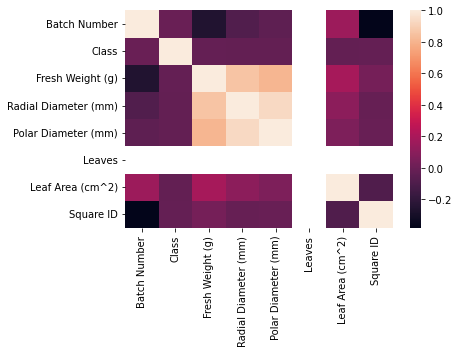

In [23]:
sns.heatmap(corr_matrix,annot=False)
plt.savefig('Fig 1 - Correlation heatmap', dpi=1200)

##  Idea of dropping the remaining two dataframe:

The remaining two dataframes "Weather" and "Planting" are dropped and will not play any part in further data preprocessing as they both haven't acquire any correlation with the main "plants" dataframe. Not only the correlation, there was also no primary key in them, which could be used as foreign key to the "Plants" dataframe.

Therefore, df_plants is our final cleaned dataframe.

## Now creating the second target column. Therefore, "Days to yeild"

The next column that we have to predict is Days to yield, it can be found by subtracting the plant date from the check date. Considering the check date is the final manual check date in which the crop is 98% ready.

In [24]:
df_plants['Days to Yield']  = (df_plants['Check Date'] - df_plants['Plant Date']).dt.days

C:\Users\Mohsin\AppData\Local\Temp/ipykernel_10968/2635172973.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plants['Days to Yield']  = (df_plants['Check Date'] - df_plants['Plant Date']).dt.days


In [25]:
df_plants.head()

,Batch Number,Flight Date.,Plant Date,Class,Fresh Weight (g),Radial Diameter (mm),Polar Diameter (mm),Leaves,Leaf Area (cm^2),Square ID,Check Date,Remove,Days to Yield
0,402,2020-04-30,2020-04-11,2,213.0,55.0,55.0,17.07,730.0,570,2020-05-22,NaN,41
1,402,2020-04-30,2020-04-11,5,179.0,40.0,40.0,17.07,643.0,570,2020-05-22,NaN,41
2,402,2020-04-30,2020-04-11,5,183.0,50.0,50.0,17.07,647.0,570,2020-05-22,NaN,41
3,402,2020-04-30,2020-04-11,3,176.0,40.0,40.0,17.07,694.0,570,2020-05-22,NaN,41
4,402,2020-04-30,2020-04-11,1,192.0,70.0,70.0,17.07,730.0,570,2020-05-22,NaN,41


## Applying Normalization : Standard Scalar()

For appying standard scalar the date should be changed divided into days, months and years. It goes for all plants, flight and check date.

In [26]:
df_plants['Plant_day'] = df_plants['Plant Date'].dt.day
df_plants['Plant_month'] = df_plants['Plant Date'].dt.month
df_plants['Plant_year'] = df_plants['Plant Date'].dt.year

C:\Users\Mohsin\AppData\Local\Temp/ipykernel_10968/2174766706.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plants['Plant_day'] = df_plants['Plant Date'].dt.day
C:\Users\Mohsin\AppData\Local\Temp/ipykernel_10968/2174766706.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plants['Plant_month'] = df_plants['Plant Date'].dt.month
C:\Users\Mohsin\AppData\Local\Temp/ipykernel_10968/2174766706.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [27]:
df_plants['Flight_day'] = df_plants['Flight Date.'].dt.day
df_plants['Flight_month'] = df_plants['Flight Date.'].dt.month
df_plants['Flight_year'] = df_plants['Flight Date.'].dt.year

C:\Users\Mohsin\AppData\Local\Temp/ipykernel_10968/3915719982.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plants['Flight_day'] = df_plants['Flight Date.'].dt.day
C:\Users\Mohsin\AppData\Local\Temp/ipykernel_10968/3915719982.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plants['Flight_month'] = df_plants['Flight Date.'].dt.month
C:\Users\Mohsin\AppData\Local\Temp/ipykernel_10968/3915719982.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [28]:
df_plants['Check_day'] = df_plants['Check Date'].dt.day
df_plants['Check_month'] = df_plants['Check Date'].dt.month
df_plants['Check_year'] = df_plants['Check Date'].dt.year

C:\Users\Mohsin\AppData\Local\Temp/ipykernel_10968/1965156335.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plants['Check_day'] = df_plants['Check Date'].dt.day
C:\Users\Mohsin\AppData\Local\Temp/ipykernel_10968/1965156335.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plants['Check_month'] = df_plants['Check Date'].dt.month
C:\Users\Mohsin\AppData\Local\Temp/ipykernel_10968/1965156335.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [29]:
df_plants

,Batch Number,Flight Date.,Plant Date,Class,Fresh Weight (g),Radial Diameter (mm),Polar Diameter (mm),Leaves,Leaf Area (cm^2),Square ID,...,Days to Yield,Plant_day,Plant_month,Plant_year,Flight_day,Flight_month,Flight_year,Check_day,Check_month,Check_year
0,402,2020-04-30,2020-04-11,2,213.0,55.0,55.0,17.07,730.0,570,...,41,11,4,2020,30,4,2020,22,5,2020
1,402,2020-04-30,2020-04-11,5,179.0,40.0,40.0,17.07,643.0,570,...,41,11,4,2020,30,4,2020,22,5,2020
2,402,2020-04-30,2020-04-11,5,183.0,50.0,50.0,17.07,647.0,570,...,41,11,4,2020,30,4,2020,22,5,2020
3,402,2020-04-30,2020-04-11,3,176.0,40.0,40.0,17.07,694.0,570,...,41,11,4,2020,30,4,2020,22,5,2020
4,402,2020-04-30,2020-04-11,1,192.0,70.0,70.0,17.07,730.0,570,...,41,11,4,2020,30,4,2020,22,5,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3191,693,2020-09-10,2020-08-08,1,81.0,36.0,40.0,17.07,247.0,290,...,40,8,8,2020,10,9,2020,17,9,2020
3192,693,2020-09-10,2020-08-08,1,103.0,40.0,50.0,17.07,211.0,290,...,40,8,8,2020,10,9,2020,17,9,2020
3193,693,2020-09-10,2020-08-08,3,132.0,40.0,40.0,17.07,337.0,290,...,40,8,8,2020,10,9,2020,17,9,2020
3194,693,2020-09-10,2020-08-08,2,183.0,50.0,45.0,17.07,370.0,290,...,40,8,8,2020,10,9,2020,17,9,2020


Now the dates are changed to 3 different columns, now dropping the initial Plant, Flight and check date.

In [30]:
df_plants.drop(columns=['Flight Date.','Plant Date','Check Date'],inplace=True)

C:\Users\Mohsin\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [31]:
df_plants.head()

,Batch Number,Class,Fresh Weight (g),Radial Diameter (mm),Polar Diameter (mm),Leaves,Leaf Area (cm^2),Square ID,Remove,Days to Yield,Plant_day,Plant_month,Plant_year,Flight_day,Flight_month,Flight_year,Check_day,Check_month,Check_year
0,402,2,213.0,55.0,55.0,17.07,730.0,570,NaN,41,11,4,2020,30,4,2020,22,5,2020
1,402,5,179.0,40.0,40.0,17.07,643.0,570,NaN,41,11,4,2020,30,4,2020,22,5,2020
2,402,5,183.0,50.0,50.0,17.07,647.0,570,NaN,41,11,4,2020,30,4,2020,22,5,2020
3,402,3,176.0,40.0,40.0,17.07,694.0,570,NaN,41,11,4,2020,30,4,2020,22,5,2020
4,402,1,192.0,70.0,70.0,17.07,730.0,570,NaN,41,11,4,2020,30,4,2020,22,5,2020


For applying standard scalar on features the target columns : "Class", "Days to Yield" are dropped and stored in seperate variable y.

In [32]:
y = df_plants[['Class','Days to Yield']]

In [33]:
y

,Class,Days to Yield
0,2,41
1,5,41
2,5,41
3,3,41
4,1,41
...,...,...
3191,1,40
3192,1,40
3193,3,40
3194,2,40


The features are now stored in a variable "X" which can be easily be normalized using standard scalar.

In [34]:
df_plants.drop(columns=['Class','Days to Yield'], inplace=True)

C:\Users\Mohsin\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [35]:
df_plants

,Batch Number,Fresh Weight (g),Radial Diameter (mm),Polar Diameter (mm),Leaves,Leaf Area (cm^2),Square ID,Remove,Plant_day,Plant_month,Plant_year,Flight_day,Flight_month,Flight_year,Check_day,Check_month,Check_year
0,402,213.0,55.0,55.0,17.07,730.0,570,NaN,11,4,2020,30,4,2020,22,5,2020
1,402,179.0,40.0,40.0,17.07,643.0,570,NaN,11,4,2020,30,4,2020,22,5,2020
2,402,183.0,50.0,50.0,17.07,647.0,570,NaN,11,4,2020,30,4,2020,22,5,2020
3,402,176.0,40.0,40.0,17.07,694.0,570,NaN,11,4,2020,30,4,2020,22,5,2020
4,402,192.0,70.0,70.0,17.07,730.0,570,NaN,11,4,2020,30,4,2020,22,5,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3191,693,81.0,36.0,40.0,17.07,247.0,290,NaN,8,8,2020,10,9,2020,17,9,2020
3192,693,103.0,40.0,50.0,17.07,211.0,290,NaN,8,8,2020,10,9,2020,17,9,2020
3193,693,132.0,40.0,40.0,17.07,337.0,290,NaN,8,8,2020,10,9,2020,17,9,2020
3194,693,183.0,50.0,45.0,17.07,370.0,290,NaN,8,8,2020,10,9,2020,17,9,2020


In [36]:
X = df_plants

In [37]:
scaled = StandardScaler()

In [38]:
X = scaled.fit_transform(X)

C:\Users\Mohsin\anaconda3\lib\site-packages\sklearn\utils\extmath.py:847: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\Mohsin\anaconda3\lib\site-packages\sklearn\utils\extmath.py:689: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


In [39]:
X

array([[-2.34818157, -1.14522012, -1.34399827, ...,  0.9499105 ,
        -3.11411364,  0.        ],
       [-2.34818157, -1.25816264, -1.70937094, ...,  0.9499105 ,
        -3.11411364,  0.        ],
       [-2.34818157, -1.24487528, -1.46578916, ...,  0.9499105 ,
        -3.11411364,  0.        ],
       ...,
       [ 1.39255331, -1.41428905, -1.70937094, ...,  0.37864865,
         1.41602163,  0.        ],
       [ 1.39255331, -1.24487528, -1.46578916, ...,  0.37864865,
         1.41602163,  0.        ],
       [ 1.39255331, -1.52723157, -1.95295271, ...,  0.37864865,
         1.41602163,  0.        ]])

Now the dataset is ready for model implementation.

## Data Visualization

The below plot shows the occurence of size of crops (output variable).

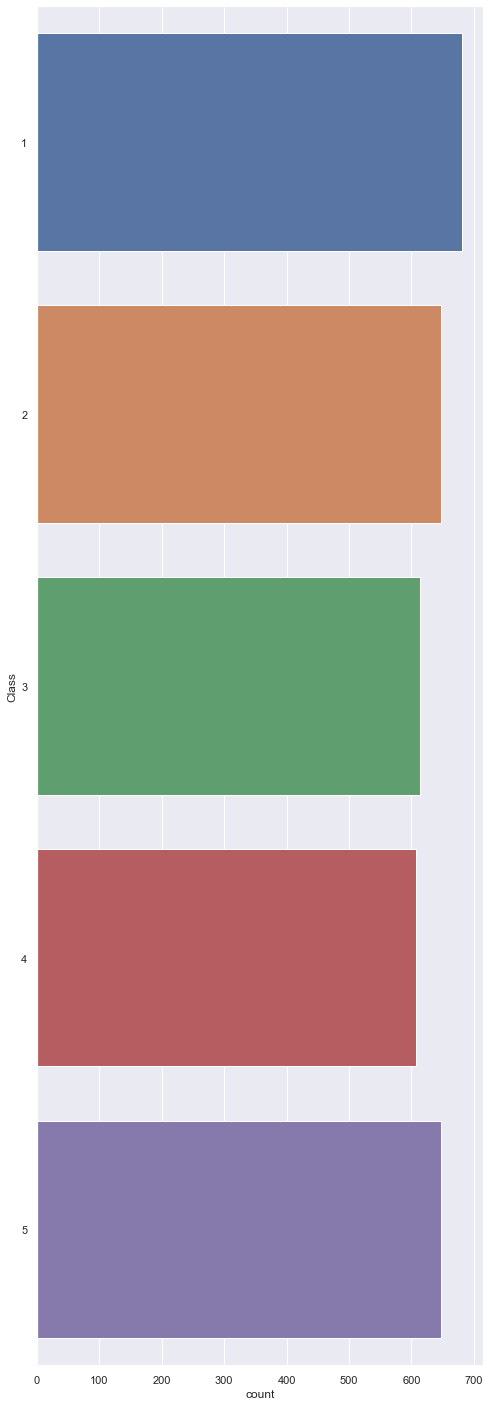

<Figure size 576x1800 with 0 Axes>

In [40]:
sns.set(rc={"figure.figsize":(8, 25)})
sns.countplot(y ='Class', data = y)

# Show the plot
plt.show()
plt.savefig("Fig - 2 Class - Size of Crop ", dpi=1200)

The countplot below shoews the no of days taken by a crop to their yield.

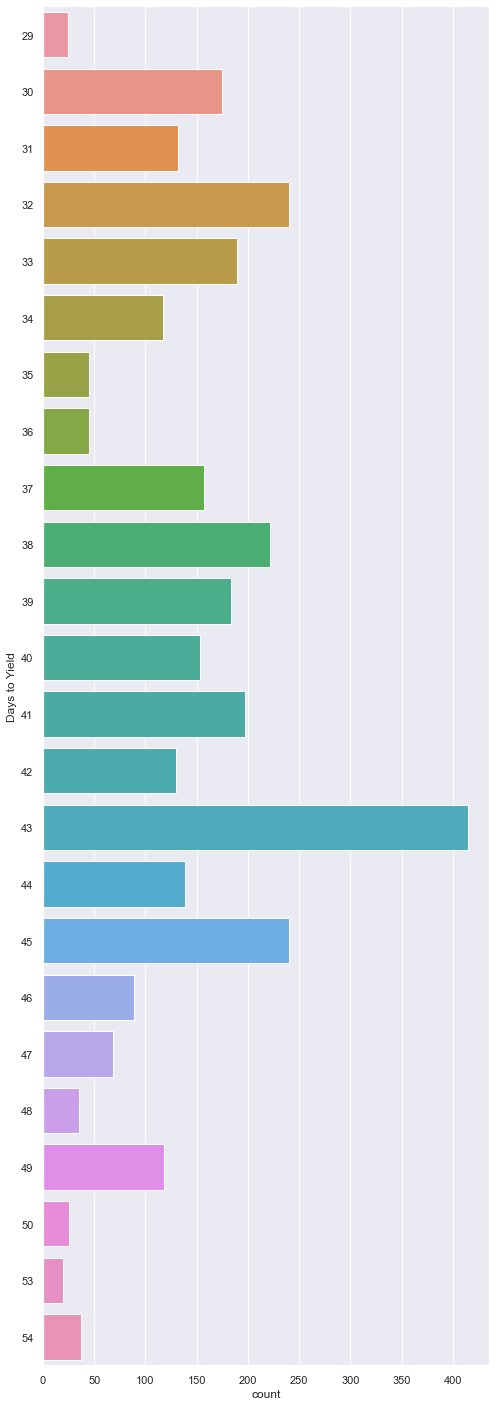

<Figure size 576x1800 with 0 Axes>

In [41]:
sns.set(rc={"figure.figsize":(8, 25)})
sns.countplot(y ='Days to Yield', data = y)

# Show the plot
plt.show()
plt.savefig("fig-3 Days to Yield", dpi=1200)

The hist plot below shows the count of each feature.

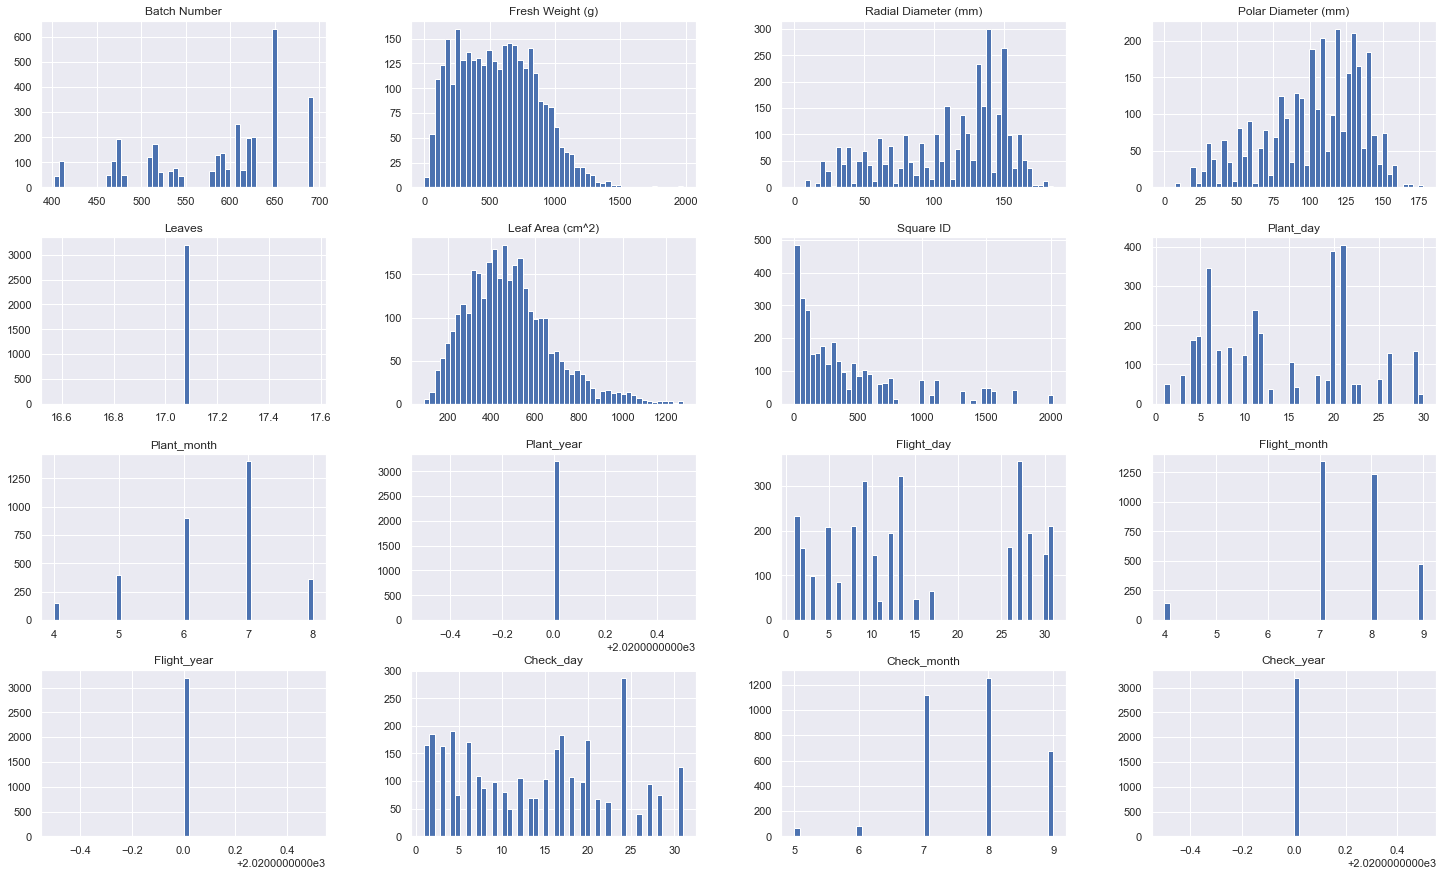

In [42]:
_ = df_plants.hist(bins=50, figsize=(25,15))
plt.savefig("fig-4", dpi=1200)